In [2]:
import numpy as np 
import pandas as pd 



In [3]:
!pip install mtcnn

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\thabr\appdata\local\programs\python\python36\python.exe' 'c:\users\thabr\appdata\local\programs\python\python36\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\thabr\AppData\Local\Temp\tmp_65r2h6l'
       cwd: C:\Users\thabr\AppData\Local\Temp\pip-install-jo9aaxo2\opencv-python_3136ba11fcf94af19af5486217278992
  Complete output (332 lines):
  
  
  --------------------------------------------------------------------------------
  -- Trying 'Ninja (Visual Studio 17 2022 x64 v143)' generator
  --------------------------------
  ---------------------------
  ----------------------
  -----------------
  ------------
  -------
  --
  Not searching for unused variables given on the command line.
  CMake Error at CMakeLists.txt:2 (PROJECT):
    Generator
  
      Ninja
  
    does not support platform specification, but platform
  
      x64
  
    was specified.
  
  
  -- Configuring


  Using cached opencv-python-4.7.0.68.tar.gz (91.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build opencv-python



  ---------------------------
  --------------------------------
  -- Trying 'Ninja (Visual Studio 16 2019 x64 v142)' generator - failure
  --------------------------------------------------------------------------------
  
  
  
  --------------------------------------------------------------------------------
  -- Trying 'Visual Studio 16 2019 x64 v142' generator
  --------------------------------
  ---------------------------
  ----------------------
  -----------------
  ------------
  -------
  --
  Not searching for unused variables given on the command line.
  CMake Error at CMakeLists.txt:2 (PROJECT):
    Generator
  
      Visual Studio 16 2019
  
    could not find any instance of Visual Studio.
  
  
  
  -- Configuring incomplete, errors occurred!
  See also "C:/Users/thabr/AppData/Local/Temp/pip-install-jo9aaxo2/opencv-python_3136ba11fcf94af19af5486217278992/_cmake_test_compile/build/CMakeFiles/CMakeOutput.log".
  --
  -------
  ------------
  -----------------
  --------

In [4]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image

import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle

from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:

DIRECTORY_train='yalefaces/train/'
DIRECTORY_test='yalefaces/test/'

(243, 320, 3)


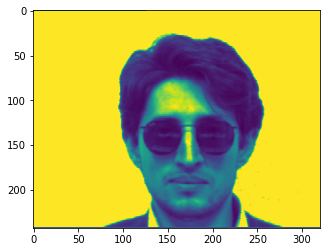

In [5]:
filename = "yalefaces/test/subject03.glasses.gif"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

In [6]:
detector = MTCNN()

results = detector.detect_faces(rgb_pixels)
results

[{'box': [115, 90, 110, 134],
  'confidence': 0.9997938275337219,
  'keypoints': {'left_eye': (147, 140),
   'right_eye': (198, 138),
   'nose': (174, 169),
   'mouth_left': (151, 192),
   'mouth_right': (195, 193)}}]

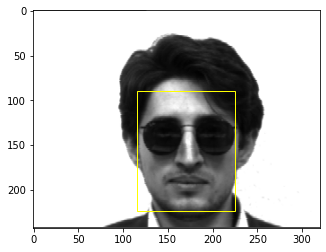

In [7]:
def draw_image_with_boxes(data, result_list):
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='yellow')
        ax.add_patch(rect)
    plt.show()

draw_image_with_boxes(rgb_pixels, results)

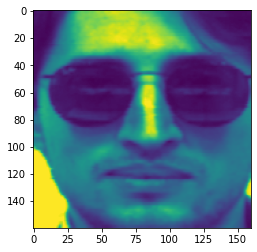

In [8]:
def extract_face_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)
    
    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    image = image.convert('RGB')
    pixels = np.asarray(image)
    results = detector.detect_faces(pixels)

    x1, y1, width, height = results[0]['box']
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]

    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    
    return gray_face

detector = MTCNN()

face_pixels = extract_face_from_file("yalefaces/test/subject03.glasses.gif")

plt.imshow(face_pixels)

In [9]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:06<00:00,  2.33it/s]


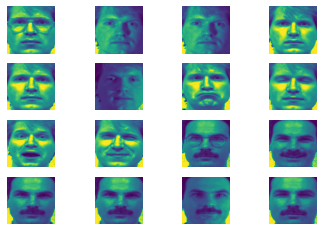

In [10]:
i = 1
faces = list()
for filename in tqdm(list_files(DIRECTORY_train, "subject")[0:16]):
    # path
    path = DIRECTORY_train + filename
    # get face
    face = extract_face_from_file(path)
    # plot
    plt.subplot(4, 4, i)
    plt.axis('off')
    plt.imshow(face)
    faces.append(face)
    i += 1
plt.show()

In [11]:
filenames = pd.DataFrame(list_files(DIRECTORY_train, "subject"))

df_train = filenames[0].str.split(".", expand=True)
df_train["filename"] = filenames

df_train = df_train.rename(columns = {0:"subject", 1:"category"})
df_train['subject'] = df_train.subject.str.replace('subject' , '')
df_train.apply(pd.to_numeric, errors='coerce').dropna()
df_train['subject'] = pd.to_numeric(df_train["subject"])


In [12]:
filenames2 = pd.DataFrame(list_files(DIRECTORY_test, "subject"))

df_test = filenames2[0].str.split(".", expand=True)
df_test["filename"] = filenames2

df_test = df_test.rename(columns = {0:"subject", 1:"category"})
df_test['subject'] = df_test.subject.str.replace('subject' , '')
df_test.apply(pd.to_numeric, errors='coerce').dropna()
df_test['subject'] = pd.to_numeric(df_test["subject"])


In [13]:
x_train=df_train.loc[:,['category','filename']]
x_test=df_test.loc[:,['category','filename']]
y_train=df_train.loc[:,['subject']]
y_test=df_test.loc[:,['subject']]

In [14]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [15]:
y_train = y_train.tolist()
y_test = y_test.tolist()

In [16]:
detector = MTCNN()

def load_dataset1(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY_train + filename
        # get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

In [17]:
detector = MTCNN()

def load_dataset2(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY_test + filename
        
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

In [18]:
x_test = load_dataset2(x_test)
x_train = load_dataset1(x_train)

print(x_test.shape)
print(x_train.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 136/136 [00:55<00:00,  2.44it/s]

(30, 160, 160)
(136, 160, 160)


In [19]:
TRAINING_DATA_DIRECTORY = "data/train"
TESTING_DATA_DIRECTORY = "data/test"
NUM_CLASSES = 15
EPOCHS = 25
BATCH_SIZE = 20
NUMBER_OF_TRAINING_IMAGES = 135
NUMBER_OF_TESTING_IMAGES = 30
IMAGE_HEIGHT = 160
IMAGE_WIDTH = 160

In [20]:
import os 

def save_keras_dataset(setname, dataset, labels, per_class):
    data = sorted(list(zip(labels, dataset)), key=lambda x: x[0])

    j = 0
    for label, gray_img in tqdm(data):
        j = (j% per_class) + 1
        
        directory = f"data/{setname}/class_{label}/"
        if not os.path.exists(directory):
                os.makedirs(directory)
        cv2.imwrite(f"{directory}class_{label}_{j}.png",gray_img)

In [21]:
import shutil
shutil.rmtree(r'data', ignore_errors=True)

# Save datasets
save_keras_dataset("test", x_test, y_test, 3)
save_keras_dataset("train", x_train, y_train, 8)

100%|███████████████████████████████████████████████████████████████████████████████| 136/136 [00:00<00:00, 740.85it/s]


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def data_generator():
    return ImageDataGenerator(
        rescale=1./255,
        
    )

def add_noise(img):
    
    VARIABILITY = 35
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [23]:
training_generator = data_generator().flow_from_directory(
    TRAINING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

testing_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

Found 120 images belonging to 15 classes.
Found 30 images belonging to 15 classes.
Found 30 images belonging to 15 classes.


In [24]:
import keras
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

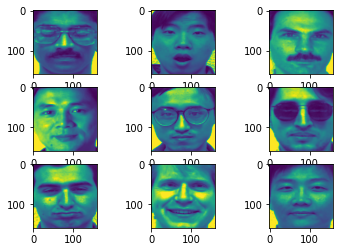

95.27


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from lib.utils import *
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
sample_images = testing_generator.next()[0]
ac=[]
f, xyarr = plt.subplots(3,3)
xyarr[0,0].imshow(sample_images[0])
xyarr[0,1].imshow(sample_images[1])
xyarr[0,2].imshow(sample_images[2])
xyarr[1,0].imshow(sample_images[3])
xyarr[1,1].imshow(sample_images[4])
xyarr[1,2].imshow(sample_images[5])
xyarr[2,0].imshow(sample_images[6])
xyarr[2,1].imshow(sample_images[7])
xyarr[2,2].imshow(sample_images[8])
plt.show()
print(accuracy_score(testing_generator,model,sample_weight=0.2)*100)
ac.append(accuracy_score(testing_generator,model,sample_weight=0.2)*100)

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)


image = cv2.imread(r"yalefaces/train/subject01.leftlight.jpeg")

imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)

skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)

import cv2
import numpy as np


img = cv2.imread('yalefaces/train/subject01.leftlight.jpeg', 0)


kernel = np.ones((5, 5), np.uint8)


img_skin = cv2.erode(img, kernel, iterations=1)

ac.append(accuracy_score(image,img_skin,sample_weight=0.4)*100)
cv2.imshow('Input', img)
cv2.imshow('skin extracted color', img_skin)


cv2.waitKey(0)

cv2.imwrite("ycrcb.png", np.hstack([image,skinYCrCb]))

True

In [27]:
print(ac)

[95.27, 91.89]


the accuracy of Opencv is 95.27 and skin texture is 91.89


C:\Users\thabr\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(50.0, 100.0)

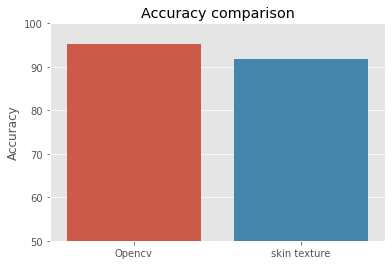

In [28]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('ggplot')
x=['Opencv','skin texture']
 
ax=sns.barplot(x,ac)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)